Code to recreate figure 2 of the [paper](http://www.sciencedirect.com/science/article/pii/S1463500317300136) with a polar projection instead of a Cartesian.

In [2]:
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.io as sio

/home/ctroupin/Software/Python/Envs/Diva-python3/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Data

We only need to have the .mat files generated by Matjaz.

In [3]:
datadir = "/home/ctroupin/Publis/Published/201606_Rissaga/"
figdir = "/home/ctroupin/Publis/Published/201606_Rissaga/figures/"
datafile = "SSH_data_OffCiutadella.mat"

We load the angles, speeds and maximal elevations from the file.<br>
To do later: add a loop on all the files.

In [4]:
mat_contents = sio.loadmat(os.path.join(datadir, datafile))
angles = np.unique(mat_contents['angles2'])
speeds = np.unique(mat_contents['speeds2'])
stationMaxElevs2 = mat_contents['stationMaxElevs2']

Construct the vectors (angles and radii) for the plots.<br>
In order to avoid losing information with pcolormesh, the vector are augmented. 

In [5]:
dangles = np.gradient(angles)[0]
angles2plot = np.arange(angles[0] + dangles/2., angles[-1], dangles)
angles2plot = np.insert(angles2plot, [0], 180.)
angles2plot = np.append(angles2plot, 270.)
dspeed = np.gradient(speeds)[0]
speeds2plot = np.arange(speeds[0] - dspeed/2., speeds[-1] + dspeed, dspeed)

# Make the plot

We add a scale factor and an offset to extend the *thickness* of the polar tiles in the plot.

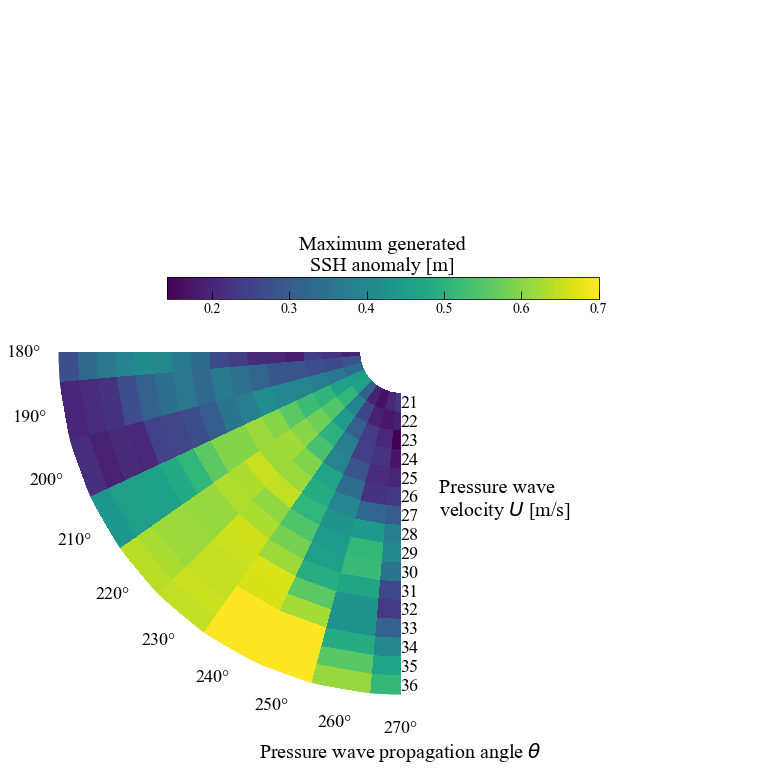

In [20]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.05, 0.05, 0.95, 0.95], projection="polar")
ax.spines['polar'].set_visible(False)

factor, offset = 3., 55.
pc = plt.pcolormesh(np.deg2rad(angles2plot), speeds2plot * factor - offset, stationMaxElevs2.T, shading='flat')

lines, labels = plt.thetagrids(np.arange(180., 271, 10), 
                               frac=1.1, fontsize=18, zorder=5)

rlines, rlabels = plt.rgrids(np.arange(21.5, 37., 1) * factor - offset, 
                             labels=np.arange(speeds.min(), speeds.max() + 1, 1), angle=-90, fontsize=18)

plt.text(-np.deg2rad(77.), 27, 'Pressure wave\nvelocity $U$ [m/s]', fontsize=20)
plt.xlabel(r'Pressure wave propagation angle $\theta$', fontsize=20)

cbaxes = fig.add_axes([0.2, 0.6, 0.6, 0.03]) 
cbar = plt.colorbar(pc, cax = cbaxes, orientation='horizontal')
cbar.ax.tick_params(axis='x',direction='in')
cbar.ax.set_title('Maximum generated\nSSH anomaly [m]', fontsize=20)
ccc = cbar.ax.get_xticklabels()
cbar.ax.set_xticklabels(ccc, fontsize=14)

plt.savefig(os.path.join(figdir, 'polarpcolor3.png'))
plt.show()
plt.close()